In [41]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


### Analisis exploratorio

In [42]:
teams = pd.read_csv('train.csv')

teams.head()

,team,wins,loss,map_wins,map_lost,round_win,round_loss,round_differential,team_rating,tanding
0,LOUD,8,1,16,7,261,215,46,944,1
1,Cloud9,8,1,17,4,253,183,70,752,2
2,NRG Esports,6,3,14,7,251,199,52,916,3
3,Leviatán,4,5,11,11,237,223,14,710,4
4,FURIA,4,5,11,12,252,260,-8,693,5


In [43]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   team                20 non-null     object
 1   wins                20 non-null     int64 
 2   loss                20 non-null     int64 
 3   map_wins            20 non-null     int64 
 4   map_lost            20 non-null     int64 
 5   round_win           20 non-null     int64 
 6   round_loss          20 non-null     int64 
 7   round_differential  20 non-null     int64 
 8    team_rating        20 non-null     int64 
 9    tanding            20 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.7+ KB


In [44]:
teams.describe()

,wins,loss,map_wins,map_lost,round_win,round_loss,round_differential,team_rating,tanding
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4.500000,4.500000,10.800000,10.800000,227.600000,227.600000,0.000000,774.200000,5.500000
std,2.259483,2.259483,3.679245,3.860733,25.138354,30.274881,45.514601,111.274246,2.946898
min,0.000000,1.000000,2.000000,4.000000,161.000000,170.000000,-86.000000,624.000000,1.000000
25%,3.750000,3.000000,9.750000,8.500000,214.750000,212.250000,-28.250000,699.750000,3.000000
50%,4.000000,5.000000,10.500000,11.500000,232.500000,225.000000,-3.000000,716.000000,5.500000
75%,6.000000,5.250000,12.500000,12.000000,249.000000,249.750000,22.000000,837.750000,8.000000
max,8.000000,9.000000,17.000000,18.000000,261.000000,278.000000,79.000000,989.000000,10.000000


In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=teams, x='team', y=' wins', color='green', label='Victorias')
sns.barplot(data=teams, x='team', y=' loss', color='red', label='Derrotas', bottom=teams[' wins'])

plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad')
plt.xlabel('Equipo')
plt.title('Comparación de Victorias y Derrotas por Equipo')
plt.legend()
plt.tight_layout()
plt.show()


ValueError: Could not interpret input ' wins'

<Figure size 1000x600 with 0 Axes>

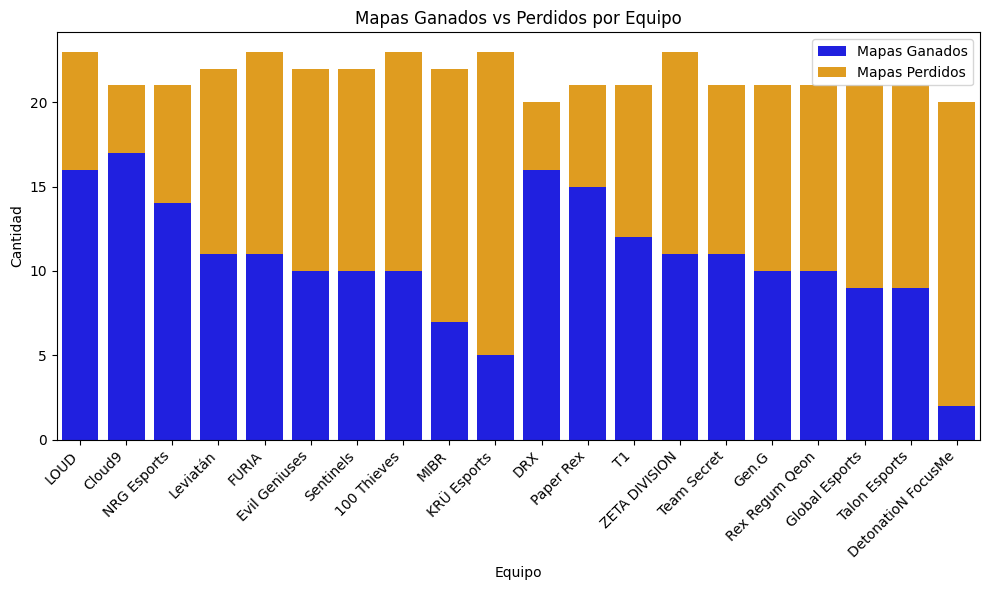

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=teams, x='team', y=' map_wins', color='blue', label='Mapas Ganados')
sns.barplot(data=teams, x='team', y=' map_lost', color='orange', label='Mapas Perdidos', bottom=teams[' map_wins'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad')
plt.xlabel('Equipo')
plt.title('Mapas Ganados vs Perdidos por Equipo')
plt.legend()
plt.tight_layout()
plt.show()


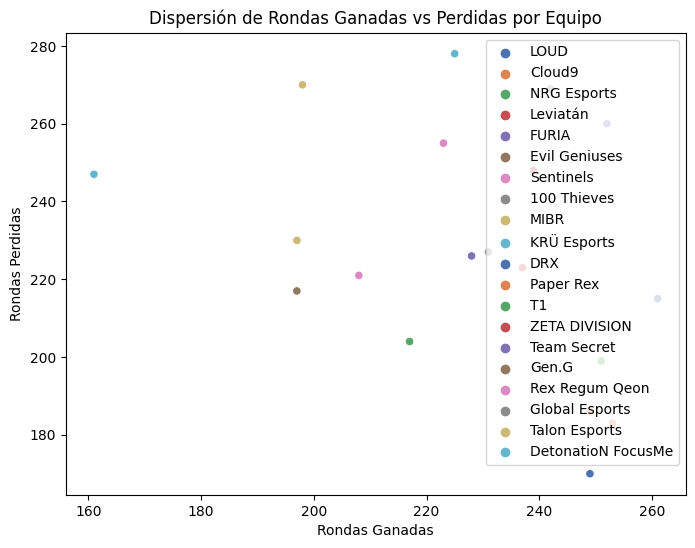

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=' round_win', y=' round_loss', data=teams, hue='team', palette='deep')
plt.xlabel('Rondas Ganadas')
plt.ylabel('Rondas Perdidas')
plt.title('Dispersión de Rondas Ganadas vs Perdidas por Equipo')
plt.legend(loc='upper right')
plt.show()


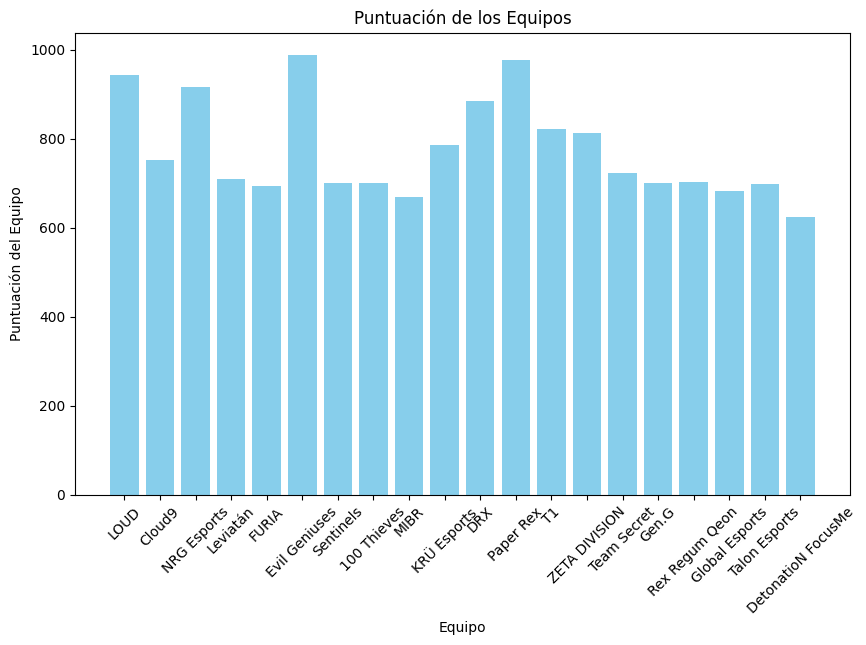

In [46]:
teams.columns = teams.columns.str.strip()
plt.figure(figsize=(10, 6))
plt.bar(teams['team'], teams['team_rating'], color='skyblue')
plt.xlabel('Equipo')
plt.ylabel('Puntuación del Equipo')
plt.title('Puntuación de los Equipos')
plt.xticks(rotation=45)
plt.show()


### Randon Forest para elección de parametros

In [49]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


train = pd.read_csv('train.csv')
test = pd.read_csv('train.csv')

# Utilizando las características numéricas para el modelo
# Excluyendo la columna 'team' y 'standing' de los conjuntos de datos
X_train_numerical = train.drop(['team', 'standing'], axis=1)
y_train_numerical = train['standing']
X_test_numerical = test.drop(['team', 'standing'], axis=1)
y_test_numerical = test['standing']

# Crear y entrenar el modelo de Random Forest con las características numéricas
model_numerical = RandomForestClassifier(n_estimators=100, random_state=42)
model_numerical.fit(X_train_numerical, y_train_numerical)

# Realizar predicciones en el conjunto de prueba
predictions_numerical = model_numerical.predict(X_test_numerical)

# Evaluar el modelo
accuracy_numerical = accuracy_score(y_test_numerical, predictions_numerical)
accuracy_numerical

1.0

## Red Neuronal FF

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd

# Preparar los CSV
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')  # Asegúrate de que este es el archivo correcto

X_train_numerical = train.drop(['team', 'standing'], axis=1)
y_train_numerical = train['standing']
X_test_numerical = test.drop(['team', 'standing'], axis=1)
y_test_numerical = test['standing']

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

# Codificar etiquetas como one-hot
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(np.array(y_train_numerical).reshape(-1, 1))
y_test_encoded = encoder.transform(np.array(y_test_numerical).reshape(-1, 1))

# Definir el modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Primera capa oculta
model.add(Dense(32, activation='relu'))  # Segunda capa oculta
model.add(Dense(16, activation='relu'))  # Tercera capa oculta
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilar el modelo
optimizer = Adam(learning_rate=0.0015)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=10)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
2023-11-22 18:52:58.515715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-22 18:52:58.517416: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 2.2644 - accuracy: 0.0500
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 2.2099 - accuracy: 0.1000
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 2.1661 - accuracy: 0.1500
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 2.1244 - accuracy: 0.1500
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 2.0867 - accuracy: 0.2000
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 2.0514 - accuracy: 0.2000
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 2.0103 - accuracy: 0.2000
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 1.9702 - accuracy: 0.2000
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 1.9381 - accuracy: 0.2000
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 1.9031 - accuracy: 0.2000
Epoch 11/100
2/2 [==========

In [51]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print("Test accuracy:", test_accuracy)


1/1 [==============================] - 0s 119ms/step - loss: 2.6865 - accuracy: 0.1000
Test accuracy: 0.10000000149011612


### Red neuronal con regularización L1

In [52]:
from tensorflow.keras.regularizers import l1

# Definir el modelo con regularización L1
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l1(0.01)))  # L1 regularización
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))  # L1 regularización
model.add(Dense(16, activation='relu', kernel_regularizer=l1(0.01)))  # L1 regularización
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilar y entrenar el modelo como antes
optimizer = Adam(learning_rate=0.0015)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=10)


Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 6.5624 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 6.4532 - accuracy: 0.1500
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 6.3499 - accuracy: 0.1500
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 6.2521 - accuracy: 0.1500
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 6.1671 - accuracy: 0.1500
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 6.0802 - accuracy: 0.2000
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 5.9958 - accuracy: 0.2000
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 5.9161 - accuracy: 0.2500
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 5.8375 - accuracy: 0.3000
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 5.7597 - accuracy: 0.4000
Epoch 11/100
2/2 [=======

In [53]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print("Test accuracy:", test_accuracy)

1/1 [==============================] - 0s 86ms/step - loss: 2.3070 - accuracy: 0.3000
Test accuracy: 0.30000001192092896


### Red neuronal FF con elastic net y cross entropy

In [54]:
from tensorflow.keras.regularizers import l1_l2

# Definir el modelo con regularización Elastic Net (L1 y L2)
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilar y entrenar el modelo como antes
optimizer = Adam(learning_rate=0.0015)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [60]:
from sklearn.model_selection import KFold

# Configuración de K-Fold Cross Validation
n_split = 5  # Por ejemplo, 5 divisiones
for train_index, test_index in KFold(n_split).split(X_train_scaled):
    x_train, x_test = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train, y_test = y_train_encoded[train_index], y_train_encoded[test_index]

    # Construir el modelo (necesario en cada iteración)
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
    model.add(Dense(10, activation='softmax'))

    # Crear un nuevo optimizador en cada iteración
    optimizer = Adam(learning_rate=0.0015)

    # Compilar el modelo
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    model.fit(x_train, y_train, epochs=100, batch_size=10)




Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 7.3247 - accuracy: 0.1250
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 7.1808 - accuracy: 0.1250
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 7.0513 - accuracy: 0.1250
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 6.9283 - accuracy: 0.1250
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 6.8106 - accuracy: 0.1875
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 6.6967 - accuracy: 0.1875
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 6.5971 - accuracy: 0.1875
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 6.4896 - accuracy: 0.1875
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 6.3868 - accuracy: 0.1250
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 6.2958 - accuracy: 0.1250
Epoch 11/100
2/2 [===========

In [59]:
 # Evaluar el modelo
print("Evaluación en la división de prueba:")
model.evaluate(x_test, y_test)

Evaluación en la división de prueba:
1/1 [==============================] - 0s 106ms/step - loss: 2.9987 - accuracy: 0.0000e+00


[2.99872088432312, 0.0]

### Red neuronal con Elastic Net

In [63]:
# Definir el modelo con regularización Elastic Net
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l1(0.01)))  # L1 regularización
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.02)))  # L1 regularización
model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.02)))  # L1 regularización
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilar y entrenar el modelo como antes
optimizer = Adam(learning_rate=0.0015)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=10)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 7.6954 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 7.5578 - accuracy: 0.1000
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 7.4288 - accuracy: 0.1000
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 7.3055 - accuracy: 0.1000
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 7.1856 - accuracy: 0.1000
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 7.0666 - accuracy: 0.1000
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 6.9492 - accuracy: 0.2000
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 6.8384 - accuracy: 0.2500
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 6.7293 - accuracy: 0.2500
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 6.6212 - accuracy: 0.2500
Epoch 11/100
2/2 [=======

In [64]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 101ms/step - loss: 2.1352 - accuracy: 0.5000


[2.1351969242095947, 0.5]

### Cambio de función de activación a Leaky ReLu

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU



# Definir el modelo con regularización Elastic Net
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], kernel_regularizer=l1(0.01)))  # L1 regularización
model.add(LeakyReLU(alpha=0.015))
model.add(Dense(32,  kernel_regularizer=l1_l2(l1=0.01, l2=0.02)))  # L1 regularización
model.add(LeakyReLU(alpha=0.015))
model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.02)))  # L1 regularización
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilar y entrenar el modelo como antes
optimizer = Adam(learning_rate=0.0015)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=10)


Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 7.8671 - accuracy: 0.1500
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 7.7208 - accuracy: 0.1000
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 7.5883 - accuracy: 0.1000
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 7.4556 - accuracy: 0.2000
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 7.3294 - accuracy: 0.2000
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 7.2083 - accuracy: 0.3000
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 7.0892 - accuracy: 0.3000
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 6.9776 - accuracy: 0.3000
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 6.8645 - accuracy: 0.3000
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 6.7550 - accuracy: 0.3000
Epoch 11/100
2/2 [===========

In [66]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 98ms/step - loss: 1.8756 - accuracy: 0.5000


[1.8755874633789062, 0.5]

### Cambio de función de activación a SWISH

In [79]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.backend import sigmoid
import tensorflow as tf

def swish(x):
    return x * sigmoid(x)


model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation=swish, kernel_regularizer=l1(0.01)))  # L1 regularización
model.add(Dense(32, activation=swish, kernel_regularizer=l1_l2(l1=0.01, l2=0.02)))  # L1 regularización
model.add(Dense(16, activation=swish, kernel_regularizer=l1_l2(l1=0.01, l2=0.02)))  # L1 regularización
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilar y entrenar el modelo como antes
optimizer = Adam(learning_rate=0.0015)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=10)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 7.6575 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 7.5239 - accuracy: 0.0500
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 7.3946 - accuracy: 0.0500
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 7.2686 - accuracy: 0.1000
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 7.1458 - accuracy: 0.1500
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 7.0263 - accuracy: 0.2500
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 6.9084 - accuracy: 0.2500
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 6.7937 - accuracy: 0.2500
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 6.6809 - accuracy: 0.2500
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 6.5704 - accuracy: 0.3000
Epoch 11/100
2/2 [=======

In [78]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 17ms/step - loss: 2.3879 - accuracy: 0.2500


[2.3878915309906006, 0.25]

### Cambio de función de activación a GeLu

In [216]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

def gelu(x):
    return 0.5 * x * (1 + tf.math.tanh(tf.math.sqrt(2 / tf.constant(np.pi)) * (x + 0.044715 * tf.pow(x, 3))))

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation=gelu, kernel_regularizer=l1(0.01)))  # L1 regularización
model.add(Dense(32, activation=gelu, kernel_regularizer=l1_l2(l1=0.01, l2=0.02)))  # L1 regularización
model.add(Dense(16, activation=gelu, kernel_regularizer=l1_l2(l1=0.01, l2=0.02)))  # L1 regularización
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilar y entrenar el modelo como antes
optimizer = Adam(learning_rate=0.0015)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train_scaled, y_train_encoded,
    epochs=200,
    batch_size=10,
    validation_data=(X_test_scaled, y_test_encoded)  # Proporcionar datos de validación aquí
)

Epoch 1/200
2/2 [==============================] - 1s 134ms/step - loss: 7.8219 - accuracy: 0.1000 - val_loss: 7.7662 - val_accuracy: 0.0000e+00
Epoch 2/200
2/2 [==============================] - 0s 19ms/step - loss: 7.6754 - accuracy: 0.1500 - val_loss: 7.6199 - val_accuracy: 0.1000
Epoch 3/200
2/2 [==============================] - 0s 20ms/step - loss: 7.5350 - accuracy: 0.2000 - val_loss: 7.4831 - val_accuracy: 0.1000
Epoch 4/200
2/2 [==============================] - 0s 20ms/step - loss: 7.4049 - accuracy: 0.2000 - val_loss: 7.3532 - val_accuracy: 0.2000
Epoch 5/200
2/2 [==============================] - 0s 21ms/step - loss: 7.2729 - accuracy: 0.2000 - val_loss: 7.2293 - val_accuracy: 0.2000
Epoch 6/200
2/2 [==============================] - 0s 19ms/step - loss: 7.1462 - accuracy: 0.3000 - val_loss: 7.1103 - val_accuracy: 0.2000
Epoch 7/200
2/2 [==============================] - 0s 20ms/step - loss: 7.0204 - accuracy: 0.3000 - val_loss: 6.9939 - val_accuracy: 0.2000
Epoch 8/200
2/2

In [217]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 118ms/step - loss: 1.4276 - accuracy: 0.7500


[1.427592158317566, 0.75]

In [218]:

# Realizar las predicciones
predictions = model.predict(X_test_scaled)

predicted_classes = np.argmax(predictions, axis=1)


print(predicted_classes)


1/1 [==============================] - 0s 61ms/step
[0 0 2 3 2 6 8 9 9 9]


In [219]:
true_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  
accuracy = np.mean(predicted_classes == true_labels)
print(f'Accuracy: {accuracy}')


Accuracy: 0.4


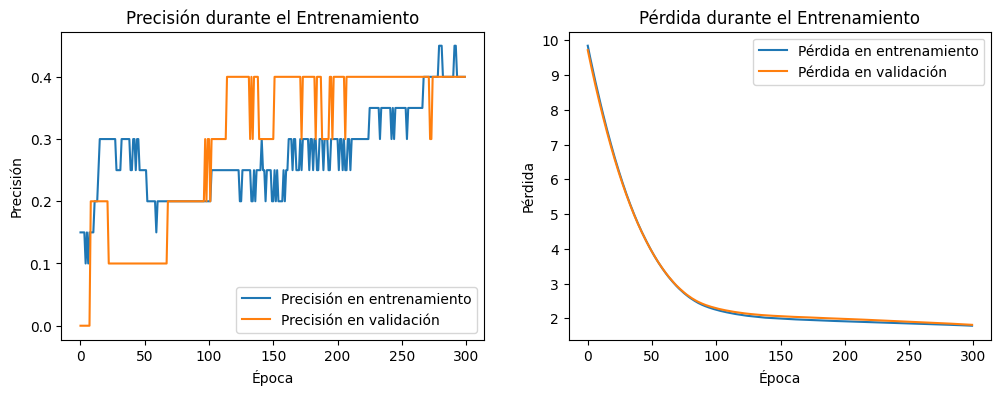

In [171]:
import matplotlib.pyplot as plt

# Datos de precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Datos de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


### última red, red 4 con cambios en los hiperparametros

In [154]:
# Definir el modelo con regularización Elastic Net
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l1(0.01)))  # L1 regularización
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.02)))  # L1 regularización
model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.02)))  # L1 regularización
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilar y entrenar el modelo como antes
optimizer = Adam(learning_rate=0.0015)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train_scaled, y_train_encoded,
    epochs=300,
    batch_size=10,
    validation_data=(X_test_scaled, y_test_encoded)  # Proporcionar datos de validación aquí
)

Epoch 1/300
2/2 [==============================] - 1s 112ms/step - loss: 7.8176 - accuracy: 0.1000 - val_loss: 7.6893 - val_accuracy: 0.1000
Epoch 2/300
2/2 [==============================] - 0s 20ms/step - loss: 7.6489 - accuracy: 0.1500 - val_loss: 7.5391 - val_accuracy: 0.1000
Epoch 3/300
2/2 [==============================] - 0s 20ms/step - loss: 7.4947 - accuracy: 0.2000 - val_loss: 7.3961 - val_accuracy: 0.2000
Epoch 4/300
2/2 [==============================] - 0s 20ms/step - loss: 7.3569 - accuracy: 0.2000 - val_loss: 7.2617 - val_accuracy: 0.2000
Epoch 5/300
2/2 [==============================] - 0s 20ms/step - loss: 7.2166 - accuracy: 0.1500 - val_loss: 7.1390 - val_accuracy: 0.3000
Epoch 6/300
2/2 [==============================] - 0s 20ms/step - loss: 7.0905 - accuracy: 0.2000 - val_loss: 7.0207 - val_accuracy: 0.2000
Epoch 7/300
2/2 [==============================] - 0s 21ms/step - loss: 6.9702 - accuracy: 0.2000 - val_loss: 6.9057 - val_accuracy: 0.2000
Epoch 8/300
2/2 [==

In [155]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 96ms/step - loss: 1.3214 - accuracy: 0.7500


[1.3214244842529297, 0.75]

In [179]:

# Realizar las predicciones
predictions = model.predict(X_test_scaled)

predicted_classes = np.argmax(predictions, axis=1)

# Imprimir las predicciones de clase
print(predicted_classes)


1/1 [==============================] - 0s 21ms/step
[0 1 2 2 2 8 8 8 8 8]


In [156]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

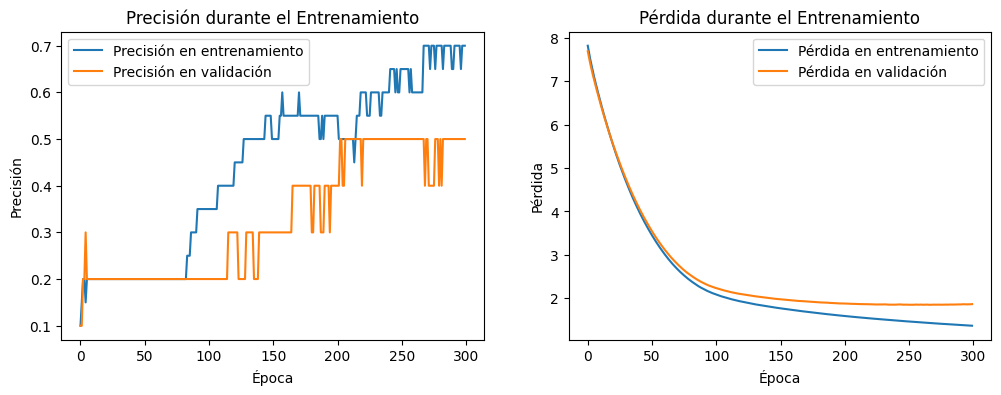

In [157]:
import matplotlib.pyplot as plt

# Datos de precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Datos de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()



In [221]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l1(0.01)))  # L1 regularización
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.02)))  # L1 regularización
model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.02)))  # L1 regularización
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilar y entrenar el modelo como antes
optimizer = Adam(learning_rate=0.0015)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_encoded, epochs=200, batch_size=10)

Epoch 1/200
2/2 [==============================] - 0s 4ms/step - loss: 7.7606 - accuracy: 0.1500
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 7.6183 - accuracy: 0.1500
Epoch 3/200
2/2 [==============================] - 0s 3ms/step - loss: 7.4880 - accuracy: 0.2000
Epoch 4/200
2/2 [==============================] - 0s 3ms/step - loss: 7.3595 - accuracy: 0.2000
Epoch 5/200
2/2 [==============================] - 0s 3ms/step - loss: 7.2397 - accuracy: 0.2000
Epoch 6/200
2/2 [==============================] - 0s 3ms/step - loss: 7.1209 - accuracy: 0.2000
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 7.0072 - accuracy: 0.2000
Epoch 8/200
2/2 [==============================] - 0s 3ms/step - loss: 6.8958 - accuracy: 0.2000
Epoch 9/200
2/2 [==============================] - 0s 3ms/step - loss: 6.7865 - accuracy: 0.2000
Epoch 10/200
2/2 [==============================] - 0s 3ms/step - loss: 6.6797 - accuracy: 0.2000
Epoch 11/200
2/2 [===========

In [222]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 133ms/step - loss: 1.5473 - accuracy: 1.0000


[1.5473237037658691, 1.0]

In [223]:
# Realizar las predicciones
predictions = model.predict(X_test_scaled)

predicted_classes = np.argmax(predictions, axis=1)

# Imprimir las predicciones de clase
print(predicted_classes)

1/1 [==============================] - 0s 45ms/step
[0 1 2 2 2 7 8 9 9 9]


In [224]:
true_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  
accuracy = np.mean(predicted_classes == true_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4
